In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
read_file = pd.read_csv(r'E:\iNeuron\household_power_consumption.txt')
read_file.to_csv (r'E:\household_power_consumption.csv', index=None)

In [ ]:
### Trying to fech randomly 50% of the data

In [4]:
random.seed(4321)
df = pd.read_csv('E:\iNeuron\household_power_consumption.csv', 
           skiprows=lambda x: x > 0 and random.random() >=0.5)

In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16-12-2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16-12-2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16-12-2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16-12-2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [6]:
df.shape

(525791, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525791 entries, 0 to 525790
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   525791 non-null  object 
 1   Time                   525791 non-null  object 
 2   Global_active_power    525791 non-null  object 
 3   Global_reactive_power  525791 non-null  object 
 4   Voltage                525791 non-null  object 
 5   Global_intensity       525791 non-null  object 
 6   Sub_metering_1         525791 non-null  object 
 7   Sub_metering_2         525791 non-null  object 
 8   Sub_metering_3         523710 non-null  float64
dtypes: float64(1), object(8)
memory usage: 36.1+ MB


In [16]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525791 entries, 0 to 525790
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   525791 non-null  object 
 1   Time                   525791 non-null  object 
 2   Global_active_power    525791 non-null  object 
 3   Global_reactive_power  525791 non-null  object 
 4   Voltage                525791 non-null  object 
 5   Global_intensity       525791 non-null  object 
 6   Sub_metering_1         525791 non-null  object 
 7   Sub_metering_2         525791 non-null  object 
 8   Sub_metering_3         523710 non-null  float64
dtypes: float64(1), object(8)
memory usage: 36.1+ MB


In [8]:
df["Global_active_power"].dtype

dtype('O')

In [9]:
out = df.replace({'?': np.nan}).dropna()

In [10]:
out["Global_active_power"]=out["Global_active_power"].astype('float')
out["Global_reactive_power"]=out["Global_reactive_power"].astype('float')
out["Voltage"]=out["Voltage"].astype('float')
out["Global_intensity"]=out["Global_intensity"].astype('float')
out["Sub_metering_1"]=out["Sub_metering_1"].astype('float')
out["Sub_metering_2"]=out["Sub_metering_2"].astype('float')

In [11]:
out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523710 entries, 0 to 525790
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   523710 non-null  object 
 1   Time                   523710 non-null  object 
 2   Global_active_power    523710 non-null  float64
 3   Global_reactive_power  523710 non-null  float64
 4   Voltage                523710 non-null  float64
 5   Global_intensity       523710 non-null  float64
 6   Sub_metering_1         523710 non-null  float64
 7   Sub_metering_2         523710 non-null  float64
 8   Sub_metering_3         523710 non-null  float64
dtypes: float64(7), object(2)
memory usage: 40.0+ MB


In [12]:
out.shape

(523710, 9)

In [13]:
out.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [14]:
out['Sub_metering'] = out['Sub_metering_1'] + out['Sub_metering_2'] + out['Sub_metering_3']

In [25]:
out['Sub_metering'].head()

0    18.0
1    17.0
2    19.0
3    18.0
4    18.0
Name: Sub_metering, dtype: float64

In [15]:
out.duplicated().sum()

0

In [16]:
out.nunique()

Date                      728
Time                     1440
Global_active_power      3797
Global_reactive_power     454
Voltage                  2484
Global_intensity          211
Sub_metering_1             80
Sub_metering_2             78
Sub_metering_3             32
Sub_metering              128
dtype: int64

In [17]:
out.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Sub_metering'],
      dtype='object')

In [18]:
df_copy = out.drop(['Date','Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'], axis=1)

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523710 entries, 0 to 525790
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    523710 non-null  float64
 1   Global_reactive_power  523710 non-null  float64
 2   Voltage                523710 non-null  float64
 3   Global_intensity       523710 non-null  float64
 4   Sub_metering           523710 non-null  float64
dtypes: float64(5)
memory usage: 24.0 MB


In [20]:
df_copy.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering
0,4.216,0.418,234.84,18.4,18.0
1,5.360,0.436,233.63,23.0,17.0
2,5.374,0.498,233.29,23.0,19.0
3,5.388,0.502,233.74,23.0,18.0
4,3.666,0.528,235.68,15.8,18.0


In [21]:
df_copy.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering
525786,0.418,0.070,240.24,1.8,0.0
525787,0.418,0.070,240.58,1.8,0.0
525788,0.420,0.068,239.96,1.8,0.0
525789,0.422,0.076,241.73,1.8,0.0
525790,0.422,0.078,242.61,1.8,0.0


In [35]:
##EDA

In [22]:
df_copy.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering
Global_active_power,1.000000,0.255990,-0.401028,0.999022,0.831375
Global_reactive_power,0.255990,1.000000,-0.120846,0.272980,0.186516
Voltage,-0.401028,-0.120846,1.000000,-0.411309,-0.359759
Global_intensity,0.999022,0.272980,-0.411309,1.000000,0.829194
Sub_metering,0.831375,0.186516,-0.359759,0.829194,1.000000


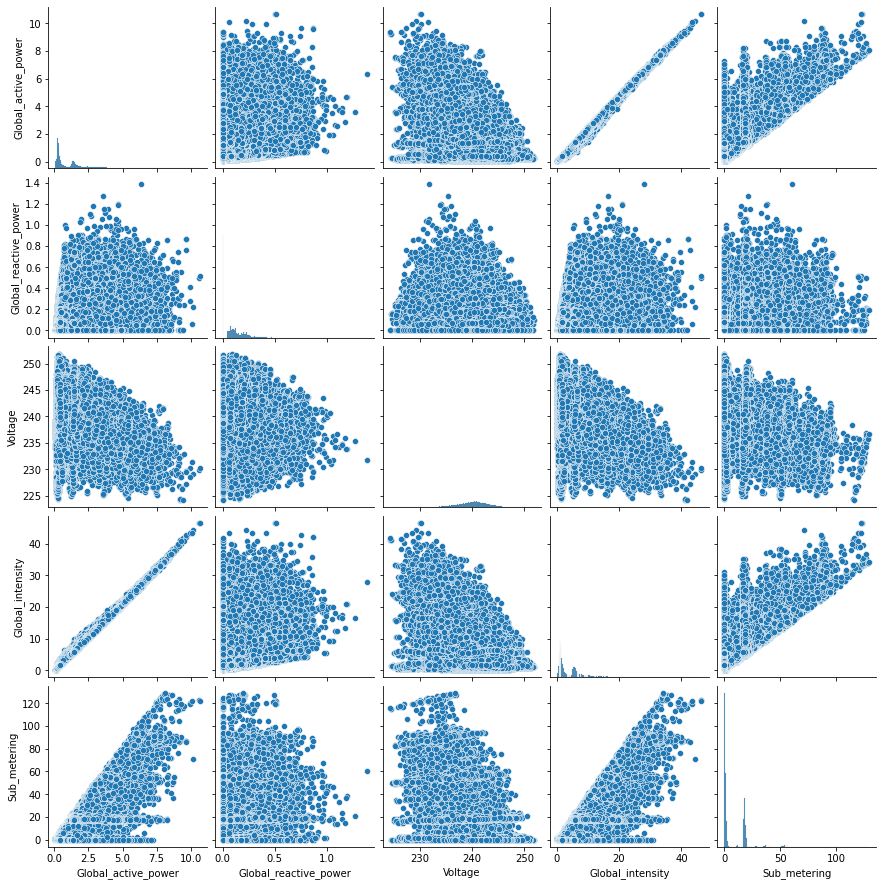

In [37]:
import seaborn as sns
sns.pairplot(df_copy)

<AxesSubplot:>

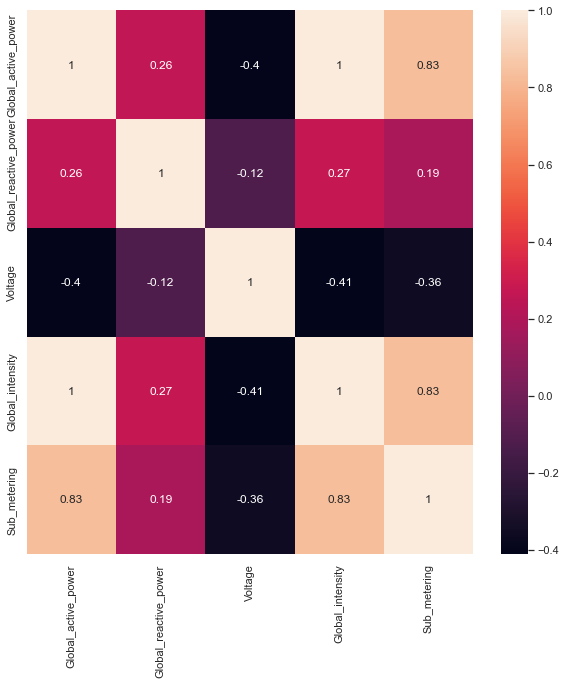

In [38]:
sns.set(rc={'figure.figsize':(10,10)})

sns.heatmap(df_copy.corr(),annot=True)

<AxesSubplot:xlabel='Global_active_power', ylabel='Sub_metering'>

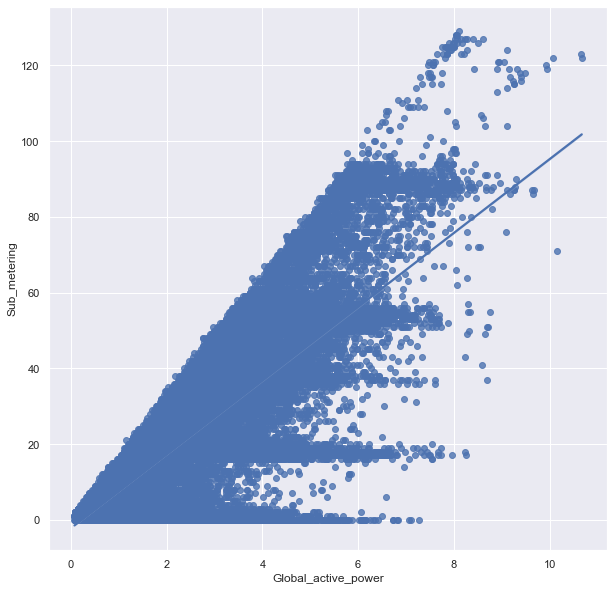

In [39]:
sns.regplot(x='Global_active_power',y="Sub_metering",data=df_copy)

<AxesSubplot:xlabel='Global_active_power'>

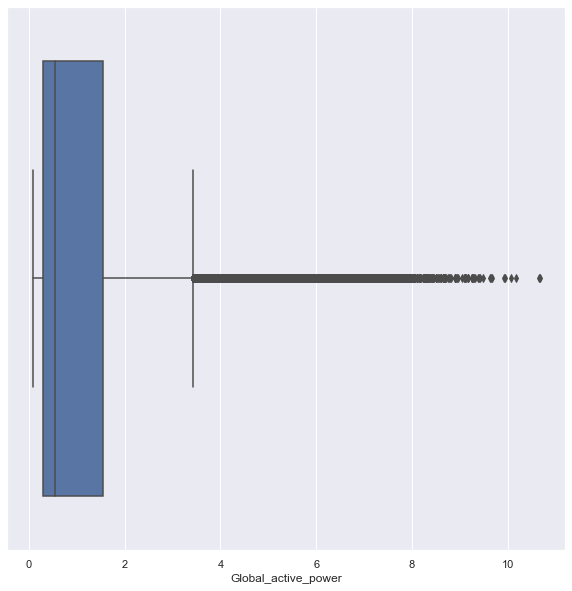

In [49]:
sns.boxplot(df_copy['Global_active_power'])

<AxesSubplot:xlabel='Global_reactive_power', ylabel='Sub_metering'>

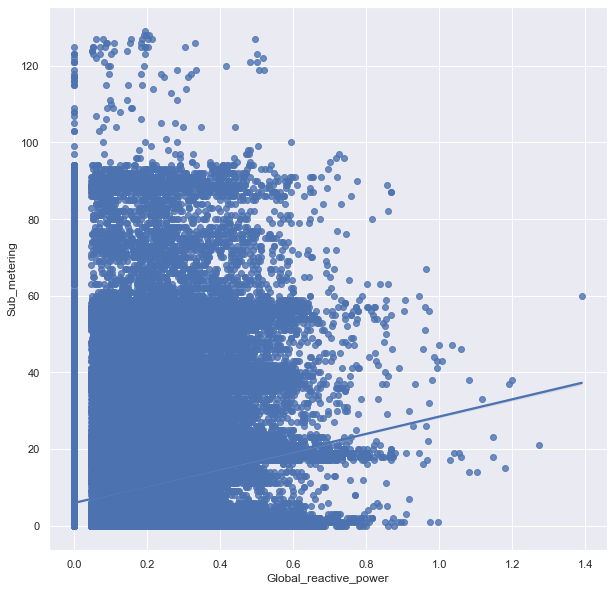

In [40]:
    sns.regplot(x='Global_reactive_power',y="Sub_metering",data=df_copy)

<AxesSubplot:xlabel='Global_reactive_power'>

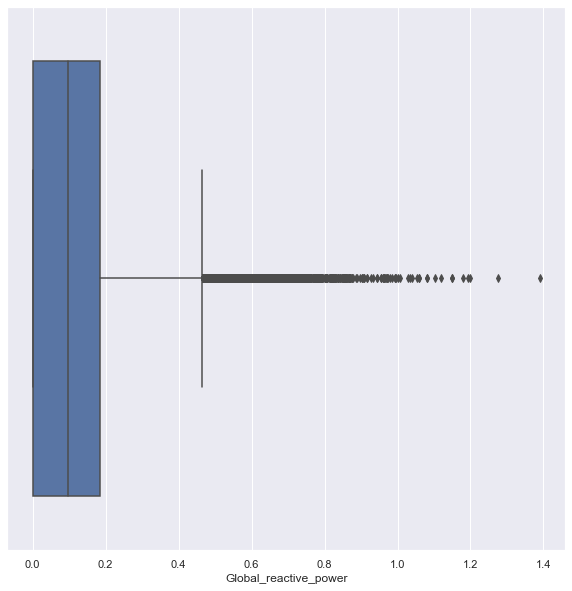

In [51]:
sns.boxplot(df_copy['Global_reactive_power'])

In [ ]:
# From the above plot we can clearly see that there is not much correlation

<AxesSubplot:xlabel='Global_intensity', ylabel='Sub_metering'>

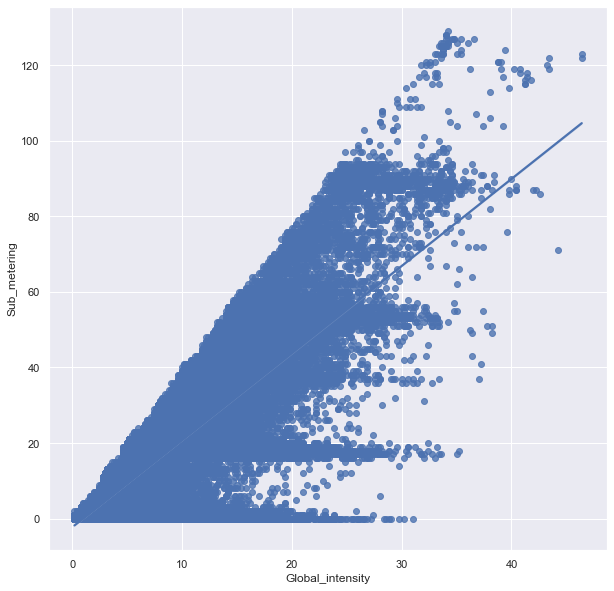

In [41]:
sns.regplot(x='Global_intensity',y="Sub_metering",data=df_copy)

<AxesSubplot:xlabel='Global_intensity'>

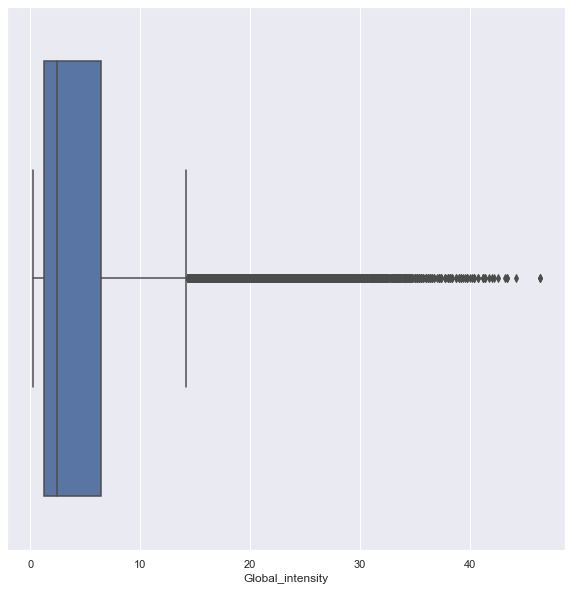

In [52]:
sns.boxplot(df_copy['Global_intensity'])

<AxesSubplot:xlabel='Voltage', ylabel='Sub_metering'>

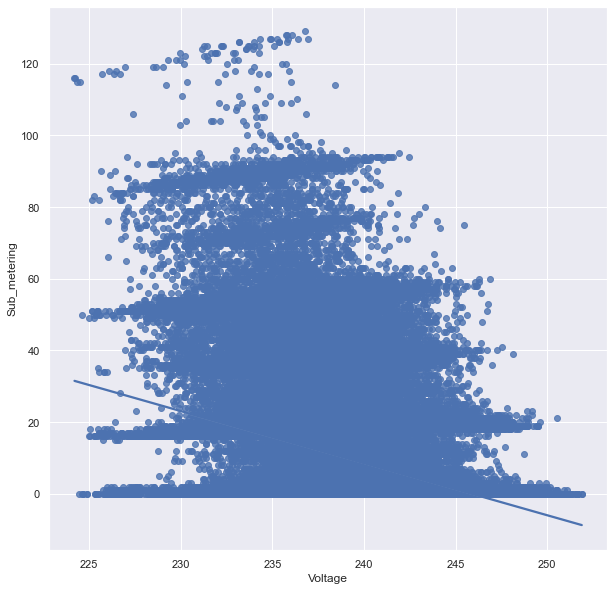

In [48]:
sns.regplot(x='Voltage',y="Sub_metering",data=df_copy)

In [ ]:
# the above graph shows there is a negative correlation

<AxesSubplot:xlabel='Voltage'>

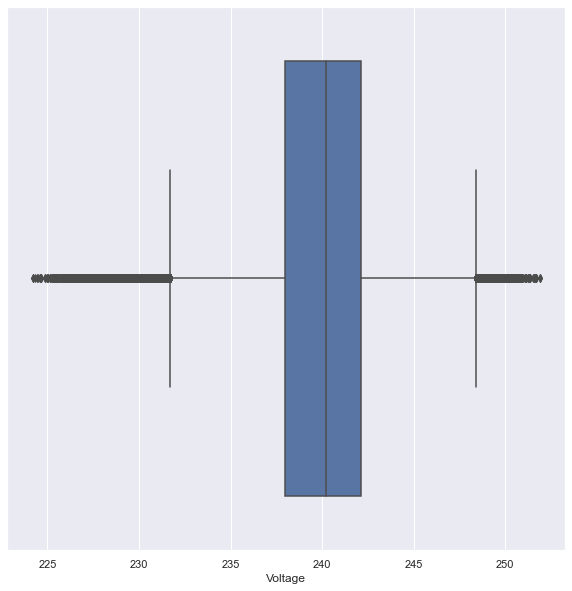

In [53]:
sns.boxplot(df_copy['Voltage'])

<AxesSubplot:xlabel='Global_intensity', ylabel='Density'>

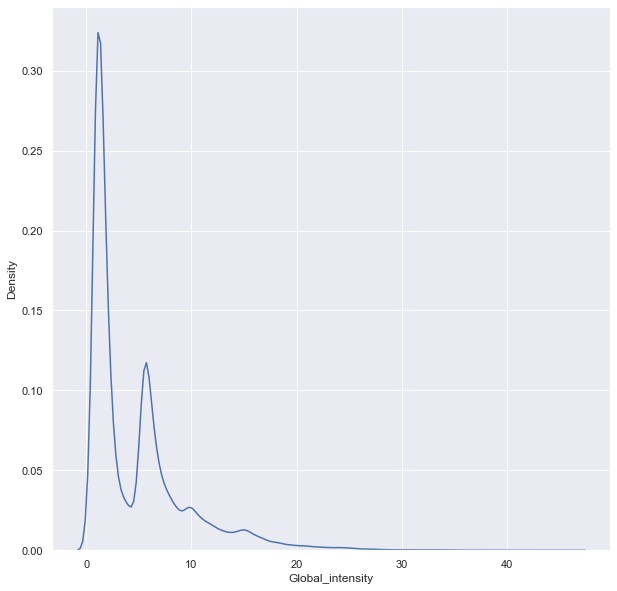

In [42]:
sns.kdeplot(df_copy['Global_intensity'])

In [ ]:
sns.kdeplot(df_copy['Global_intensity'])

<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

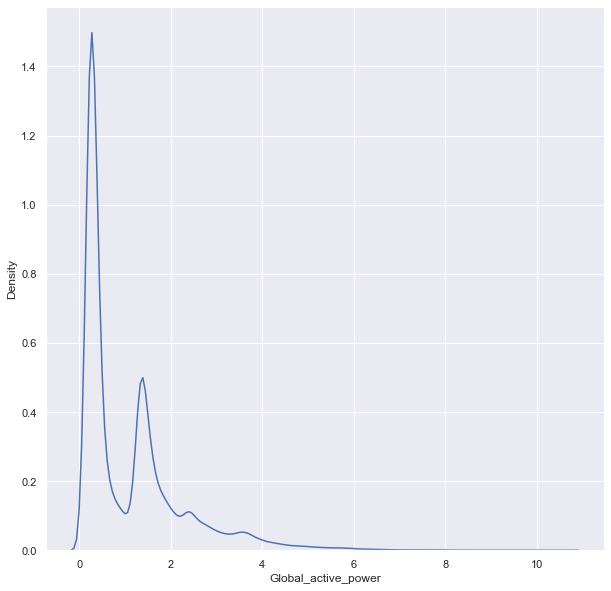

In [43]:
sns.kdeplot(df_copy['Global_active_power'])

<AxesSubplot:xlabel='Global_reactive_power', ylabel='Density'>

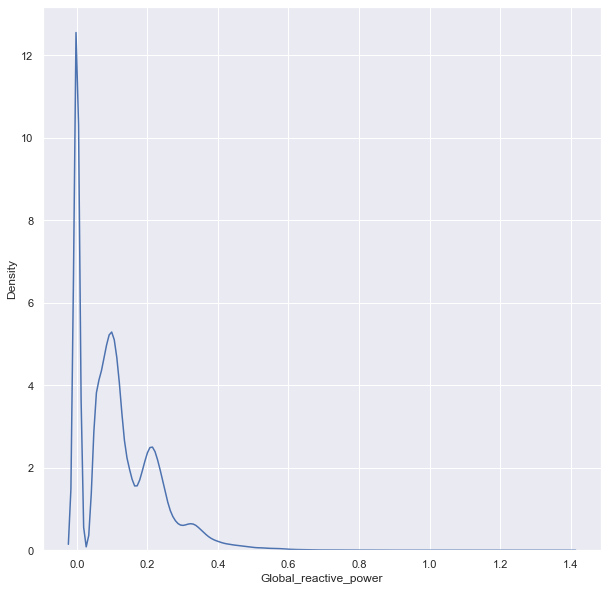

In [44]:
sns.kdeplot(df_copy['Global_reactive_power'])

<AxesSubplot:xlabel='Voltage', ylabel='Density'>

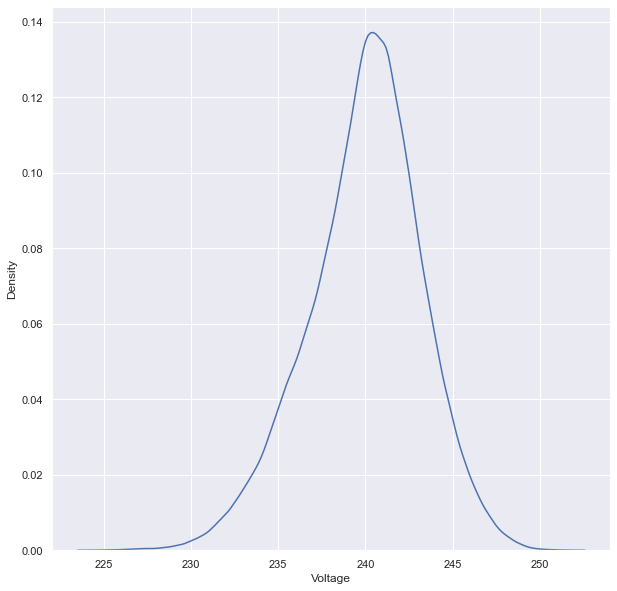

In [45]:
sns.kdeplot(df_copy['Voltage'])

In [26]:
## Independent And Dependent Features
X=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]

In [27]:
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,4.216,0.418,234.84,18.4
1,5.360,0.436,233.63,23.0
2,5.374,0.498,233.29,23.0
3,5.388,0.502,233.74,23.0
4,3.666,0.528,235.68,15.8


In [28]:
y.head()

0    18.0
1    17.0
2    19.0
3    18.0
4    18.0
Name: Sub_metering, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [52]:
X_train.shape

(350885, 4)

In [53]:
X_test.shape

(172825, 4)

In [54]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [55]:
X_train=scaler.fit_transform(X_train)

In [56]:
X_test=scaler.transform(X_test)

In [57]:
X_train

array([[-0.88500889, -1.08126263,  0.10467344, -0.9059775 ],
       [-0.6671291 , -1.08126263,  1.51389751, -0.61194624],
       [ 0.75528935,  0.01658205, -0.69754718,  0.73219668],
       ...,
       [-0.49176244, -1.08126263,  1.27902683, -0.52793731],
       [-0.76455502, -1.08126263,  0.21143284, -0.7799641 ],
       [ 0.58877959,  1.13272415,  0.69642554,  0.56417881]])

In [58]:
X_test

array([[ 0.90939944, -0.66042217, -1.42961163,  0.90021454],
       [-0.70432809, -0.20298688, -0.23085609, -0.69595517],
       [-0.78758296, -0.62382735,  1.27902683, -0.82196857],
       ...,
       [-0.74684122,  0.27274581,  0.15957828, -0.69595517],
       [ 1.32213107, -1.08126263, -0.68839637,  1.27825474],
       [-0.7840402 , -1.08126263,  0.26023714, -0.7799641 ]])

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression=LinearRegression()

In [61]:
regression.fit(X_train,y_train)

LinearRegression()

In [62]:
print(regression.coef_)

[ 21.18166833  -0.18694725  -0.5621679  -10.35241257]


In [63]:
print(regression.intercept_)

8.584068854468004


In [64]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [65]:
reg_pred

array([19.4544198 ,  1.03776773, -0.19129954, ..., -0.17115787,
       23.94512376,  0.10714161])

# Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

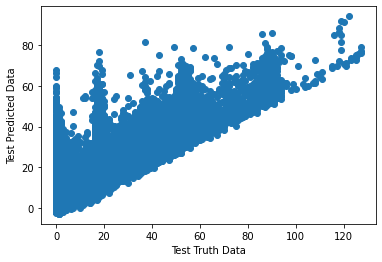

In [66]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [67]:
## residuals
residuals=y_test-reg_pred

In [68]:
residuals

67514     -2.454420
241125    -1.037768
525251     0.191300
289894    -1.364619
278263     0.483961
            ...    
400912    11.508201
261459   -20.069426
178767     1.171158
337918    -6.945124
279957    -0.107142
Name: Sub_metering, Length: 172825, dtype: float64

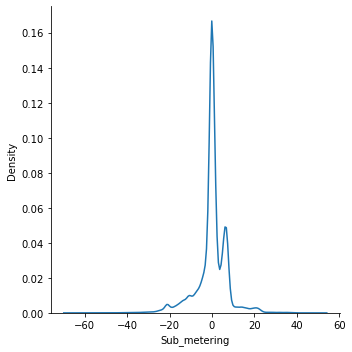

In [69]:
sns.displot(residuals,kind="kde")

In [70]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

53.89664153078033
4.531514859853339
7.341433206859566


# R square and adjusted R square

In [71]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.691697495920793


In [72]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6916903601146576

In [73]:
## Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [74]:
ridge.fit(X_train,y_train)

Ridge()

In [75]:
ridge.predict(X_test)

array([19.45406272,  1.03792744, -0.19221082, ..., -0.16872316,
       23.94390432,  0.10827952])

In [76]:
## Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [77]:
lasso.fit(X_train, y_train)

Lasso()

In [78]:
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.6836951714984222, 0.6865414327691371)

In [79]:
lasso.coef_

array([10.0175148, -0.       , -0.       ,  0.       ])

In [80]:
## Lasso Prediction for the test data
lasso_reg_predicted = lasso.predict(X_test)

In [81]:
lasso_reg_predicted

array([17.69399124,  1.52845183,  0.69444485, ...,  1.10257592,
       21.82853644,  0.72993451])

Text(0, 0.5, 'Lasso Test Predicted Data')

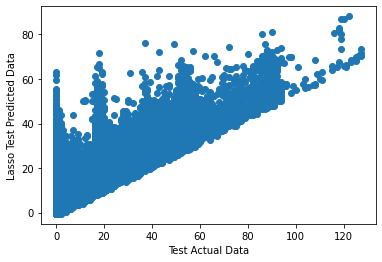

In [83]:
plt.scatter(y_test,lasso_reg_predicted)
plt.xlabel("Test Actual Data")
plt.ylabel("Lasso Test Predicted Data")

In [84]:
## residuals
lassoresiduals=y_test-lasso_reg_predicted

In [85]:
lassoresiduals

67514     -0.693991
241125    -1.528452
525251    -0.694445
289894    -2.291479
278263    -0.836403
            ...    
400912    12.956278
261459   -18.634467
178767    -0.102576
337918    -4.828536
279957    -0.729935
Name: Sub_metering, Length: 172825, dtype: float64

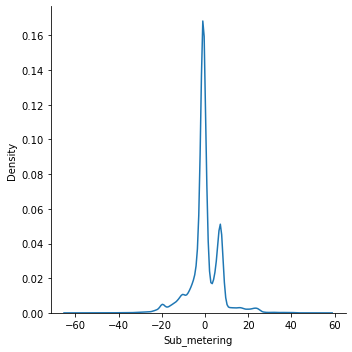

In [86]:
sns.displot(lassoresiduals,kind="kde")

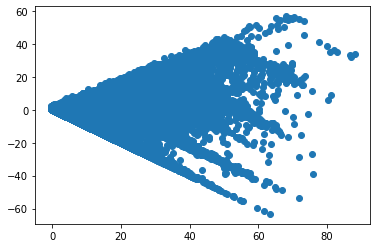

In [87]:
## Scatter plot with lasso predictions and residual
##uniform distribution
plt.scatter(lasso_reg_predicted,lassoresiduals)

In [88]:
## Elasticnet
# import model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha = 1)

In [89]:
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1)

In [90]:
elasticnet.score(X_train, y_train)

0.6540262583386034

In [91]:
elasticnet.score(X_test, y_test)

0.6513825166563552

In [92]:
## Elasticnet Prediction for the test data
elasticnetPredicted = elasticnet.predict(X_test)

In [93]:
elasticnetPredicted

array([16.90698225,  2.98806866,  1.17805625, ...,  2.56573602,
       19.68247835,  2.00681282])

Text(0, 0.5, 'Elasticnet Test Predicted Data')

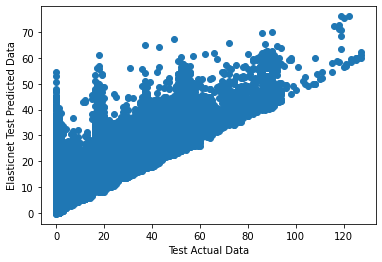

In [94]:
plt.scatter(y_test,elasticnetPredicted)
plt.xlabel("Test Actual Data")
plt.ylabel("Elasticnet Test Predicted Data")

In [95]:
## residuals
elasticnet_residuals=y_test-elasticnetPredicted

In [96]:
elasticnet_residuals

67514      0.093018
241125    -2.988069
525251    -1.178056
289894    -3.107170
278263    -1.133912
            ...    
400912    13.673011
261459   -17.174447
178767    -1.565736
337918    -2.682478
279957    -2.006813
Name: Sub_metering, Length: 172825, dtype: float64

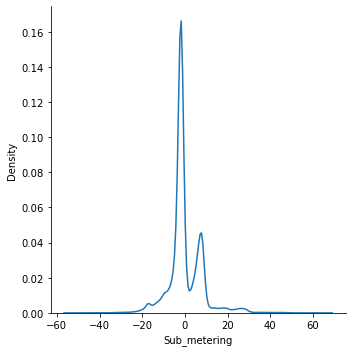

In [97]:
sns.displot(elasticnet_residuals,kind="kde")

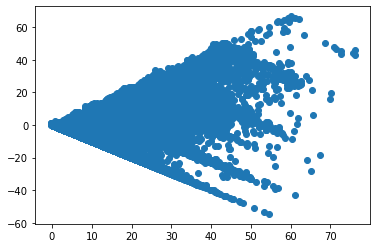

In [98]:
##uniform distribution
plt.scatter(elasticnetPredicted,elasticnet_residuals)